<a href="https://colab.research.google.com/github/FarrelAD/2341720081_ML_2025/blob/main/JS14/P1_JS14.ipynb" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Preparation

In [1]:
!pip install -q gdown

In [12]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import gdown
import zipfile
import matplotlib.pyplot as plt

# Data Loading

In [3]:
file_id = "1vYrqBI1VmiXXJd5sgtKK2nuQvC8T1ryb"
url = f"https://drive.google.com/uc?id={file_id}"

output = "data.zip"
gdown.download(url, output, quiet=False)

with zipfile.ZipFile("data.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

Downloading...
From (original): https://drive.google.com/uc?id=1vYrqBI1VmiXXJd5sgtKK2nuQvC8T1ryb
From (redirected): https://drive.google.com/uc?id=1vYrqBI1VmiXXJd5sgtKK2nuQvC8T1ryb&confirm=t&uuid=0936cba1-a8f4-45cc-85be-095f5260c219
To: /content/data.zip
100%|██████████| 233M/233M [00:04<00:00, 52.1MB/s]


# Data Preprocessing

## For training

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset/dataset/training_set',
    image_size=(64, 64),
    batch_size=32,
    label_mode='binary'
)

Found 8000 files belonging to 2 classes.


## For testing

In [5]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset/dataset/test_set',
    image_size=(64, 64),
    batch_size=32,
    label_mode='binary'
)

Found 2000 files belonging to 2 classes.


# Model Definition

In [6]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Training

In [7]:
cnn.fit(x = train_ds, validation_data = test_ds, epochs = 25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 165ms/step - accuracy: 0.5008 - loss: 14.2722 - val_accuracy: 0.5585 - val_loss: 0.6809
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 161ms/step - accuracy: 0.6006 - loss: 0.6479 - val_accuracy: 0.5920 - val_loss: 0.6799
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.6891 - loss: 0.5572 - val_accuracy: 0.6000 - val_loss: 0.7321
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.7654 - loss: 0.4504 - val_accuracy: 0.6165 - val_loss: 0.8184
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.8230 - loss: 0.3642 - val_accuracy: 0.6135 - val_loss: 0.9547
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.8719 - loss: 0.2752 - val_accuracy: 0.6185 - val_loss: 1.0514
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 167ms/step - accuracy: 0.8994 - loss: 0.2218 - val_accuracy: 0.6280 - val_loss: 1.1797
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.8975 - loss: 

# Model Prediction

In [9]:
train_ds.class_names

['cats', 'dogs']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


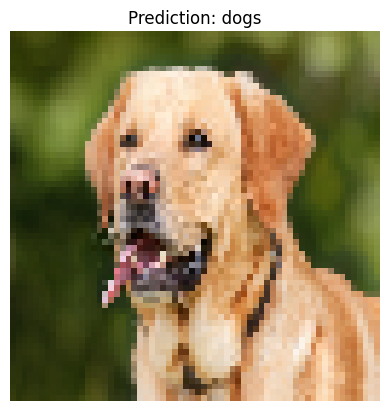

Prediction: dogs


In [14]:
img_path = 'dataset/dataset/single_prediction/cat_or_dog_1.jpg'

raw_image = image.load_img(img_path, target_size=(64, 64))
test_image = image.img_to_array(raw_image)
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)

class_names = train_ds.class_names

if result[0][0] > 0.5:
    prediction = class_names[1]
else:
    prediction = class_names[0]

# --- Show image + prediction ---
plt.imshow(raw_image)
plt.title(f"Prediction: {prediction}")
plt.axis('off')
plt.show()

print("Prediction:", prediction)